<a href="https://colab.research.google.com/github/poolGolez/tf-playground/blob/main/exercises/%5Bclassification%5D_generated_moon_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Generation
In this notebook, we will use the [generated moons dataset from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons).  We will have $1000$ samples for

In [1]:
from sklearn.datasets import make_moons

N = 1000

X, y = make_moons(N, noise=0.15, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

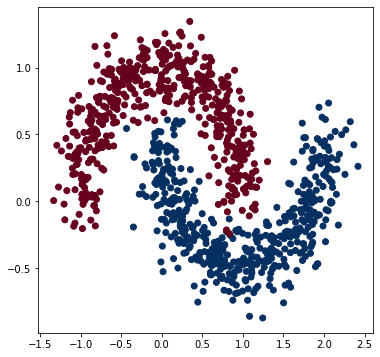

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu)

# Split the dataset
We will split the dataset into the following:
* $80\%$ as the **train_set** (800 samples)
* $20\%$ as the **test_set** (200 samples)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

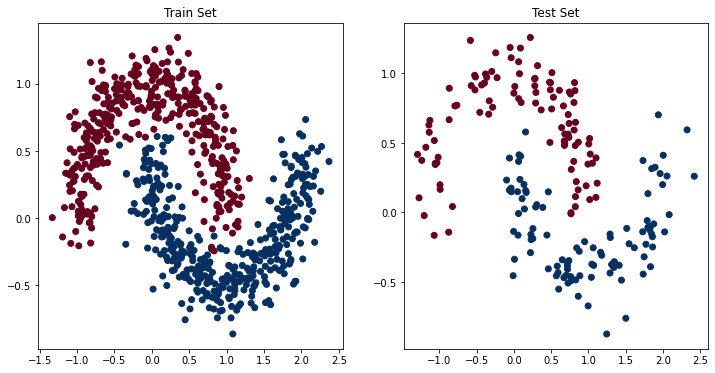

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Set")
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.RdBu)

plt.subplot(1,2,2)
plt.title("Test Set")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.RdBu)
plt.show()

# Build the model

## Model 1 (Baseline)

We start constructing a model out of 1 hidden layer containing a single Dense unit.

In [5]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# model_1 = tf.keras.Sequential([
#     tf.keras.layers.Dense(10, 'relu'),
#     tf.keras.layers.Dense(10, 'relu'),
#     tf.keras.layers.Dense(10, 'relu'),
#     tf.keras.layers.Dense(1, 'sigmoid'),
# ])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, epochs=100, verbose=0)

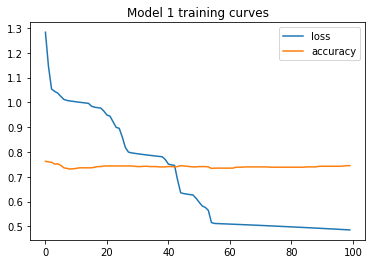

In [6]:
import pandas as pd
pd.DataFrame(history_1.history).plot()
plt.title("Model 1 training curves")
plt.show()

🔍 It looks like the loss is going down; however, the accuracy remains at 80% and shows no improvement at all.

In [7]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x1_min, x1_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  x2_min, x2_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                     np.linspace(x2_min, x2_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)
  y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step


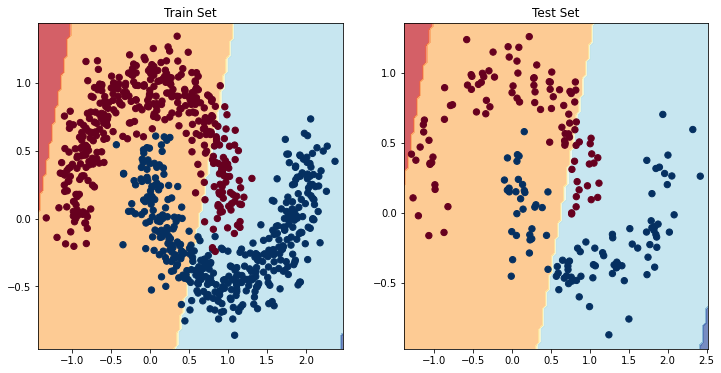

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_1, X_train, y_train)
plt.title("Train Set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_1, X_test, y_test)
plt.title("Test Set")
plt.show()

## Model 2 (more units, more layers)


In [9]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=0)

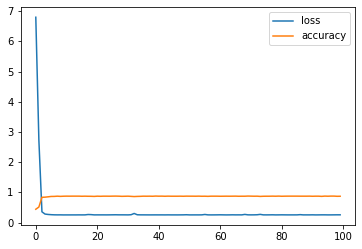

In [10]:
pd.DataFrame(history_2.history).plot()

313/313 [==============================] - 0s 1ms/step


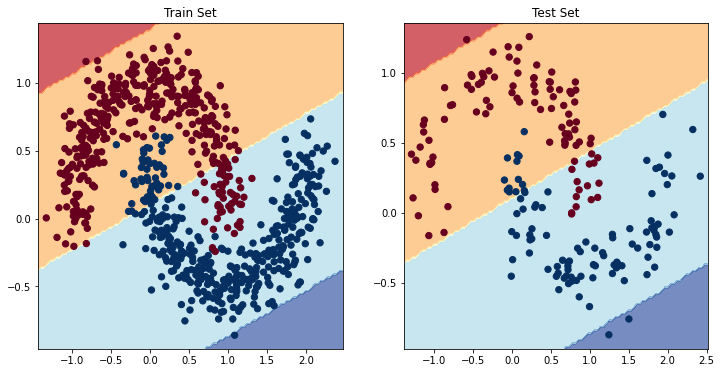

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_2, X_train, y_train)
plt.title("Train Set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_2, X_test, y_test)
plt.title("Test Set")
plt.show()

In [12]:
model_2.predict(X_test)

7/7 [==============================] - 0s 2ms/step


array([[ 1.0594349 ],
       [ 0.42726833],
       [ 1.2212105 ],
       [ 0.06648318],
       [ 1.2685543 ],
       [ 1.2013916 ],
       [ 0.6999802 ],
       [ 0.77422553],
       [ 1.5657297 ],
       [ 0.3165643 ],
       [ 0.32702565],
       [ 1.1071451 ],
       [ 0.5566313 ],
       [ 1.5449599 ],
       [-0.31065717],
       [ 0.80750257],
       [ 0.755256  ],
       [-0.02150928],
       [ 1.1019862 ],
       [-0.06603304],
       [ 0.28930998],
       [ 0.4592958 ],
       [ 1.1247449 ],
       [-0.33497795],
       [ 0.37871894],
       [ 0.69928443],
       [-0.07934726],
       [ 0.19328645],
       [-0.22757939],
       [ 1.0517864 ],
       [ 0.45176944],
       [ 0.34972712],
       [ 0.31228265],
       [ 1.2055811 ],
       [ 0.05687393],
       [ 0.78402805],
       [ 0.6467885 ],
       [ 1.1140302 ],
       [ 1.3451996 ],
       [ 1.2294573 ],
       [ 1.0345869 ],
       [ 1.1997887 ],
       [ 0.6784199 ],
       [-0.09652249],
       [ 0.10236198],
       [ 0